In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [3]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

In [5]:
# df.corr()
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,0,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,0,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,1,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df["satisfaction"] = df["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied": 1})

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df=df.drop(['Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'
       ],axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Loyal Customer,13,Personal Travel,460,25,18.0,0
1,0,disloyal Customer,25,Business travel,235,1,6.0,0
2,1,Loyal Customer,26,Business travel,1142,0,0.0,1
3,1,Loyal Customer,25,Business travel,562,11,9.0,0
4,0,Loyal Customer,61,Business travel,214,0,0.0,1
...,...,...,...,...,...,...,...,...
103899,1,disloyal Customer,23,Business travel,192,3,0.0,0
103900,0,Loyal Customer,49,Business travel,2347,0,0.0,1
103901,0,disloyal Customer,30,Business travel,1995,7,14.0,0
103902,1,disloyal Customer,22,Business travel,1000,0,0.0,0


In [8]:
import matplotlib.pyplot as plt

In [9]:
# Scatter plot to show customer satisfaction related to Flight Distance
#Scatterplot to show customer satisfaction related to Departure Delay in minutes and Arrival Delay in minutes


In [1]:
# Scatter plot to show customer satisfaction related to Flight Distance
# Make a ranges and compare the ratios 
#short distance
#median distance
#long distance
#obseerve wheter the proportions are consistence
#it could be a pie chart or a bar chart
df1=df.loc[df['satisfaction']==0] #
df2=df.loc[df['satisfaction']==1] 
df1=df1.loc[df['Flight Distance']<75] 
df2=df2.loc[df['Flight Distance']<75]

print(max(df['Flight Distance']))
# Cannot observe a linear relation between Flight Distance and Customer Satisfaction

NameError: name 'df' is not defined

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


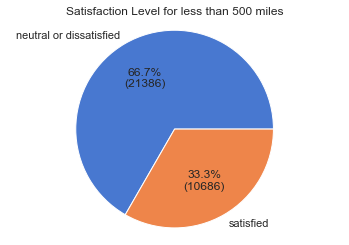

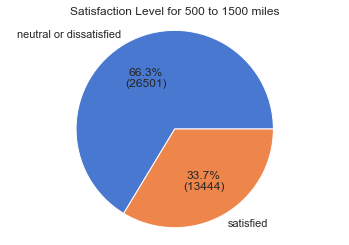

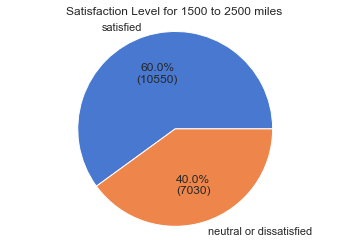

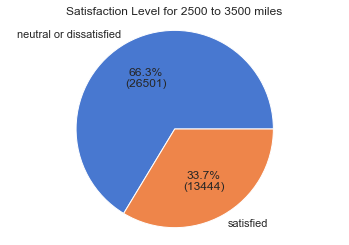

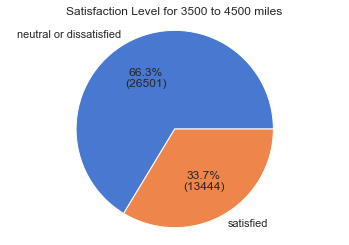

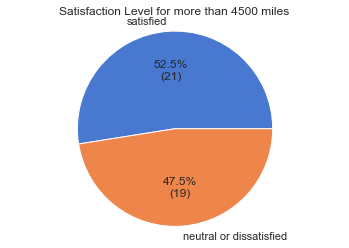

In [25]:
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
df_dist = df[['Flight Distance', 'satisfaction']]
df_dist["satisfaction"] = df_dist["satisfaction"].replace({0: "neutral or dissatisfied", 1: "satisfied"})

df_1 = df_dist.loc[df_dist['Flight Distance'] < 500]
df_2 = df_dist.loc[(df_dist['Flight Distance'] > 500) & (df_dist['Flight Distance'] < 1500)]
df_3 = df_dist.loc[(df_dist['Flight Distance'] > 1500) & (df_dist['Flight Distance'] < 2500)]
df_4 = df_dist.loc[(df_dist['Flight Distance'] > 500) & (df_dist['Flight Distance'] < 1500)]
df_5 = df_dist.loc[(df_dist['Flight Distance'] > 500) & (df_dist['Flight Distance'] < 1500)]
df_6 = df_dist.loc[df_dist['Flight Distance'] > 4500]
# df_male.value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
    
sns.set_theme(style="white", palette = 'muted')
sat = df_1['satisfaction'].value_counts()
plt.pie(sat,labels = sat.index, autopct=autopct_format(sat))
plt.title('Satisfaction Level for less than 500 miles')
plt.axis('equal')
plt.show()

sat = df_2['satisfaction'].value_counts()
plt.pie(sat,labels = sat.index, autopct=autopct_format(sat))
plt.title('Satisfaction Level for 500 to 1500 miles')
plt.axis('equal')
plt.show()

sat = df_3['satisfaction'].value_counts()
plt.pie(sat,labels = sat.index, autopct=autopct_format(sat))
plt.title('Satisfaction Level for 1500 to 2500 miles')
plt.axis('equal')
plt.show()

sat = df_4['satisfaction'].value_counts()
plt.pie(sat,labels = sat.index, autopct=autopct_format(sat))
plt.title('Satisfaction Level for 2500 to 3500 miles')
plt.axis('equal')
plt.show()

sat = df_5['satisfaction'].value_counts()
plt.pie(sat,labels = sat.index, autopct=autopct_format(sat))
plt.title('Satisfaction Level for 3500 to 4500 miles')
plt.axis('equal')
plt.show()

sat = df_6['satisfaction'].value_counts()
plt.pie(sat,labels = sat.index, autopct=autopct_format(sat))
plt.title('Satisfaction Level for more than 4500 miles')
plt.axis('equal')
plt.show()

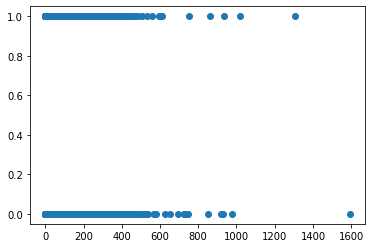

In [11]:
#Scatter plot to show customer satisfaction related to Departure Delay in minutes
plt.scatter(df['Departure Delay in Minutes'],df['satisfaction'])
plt.show()


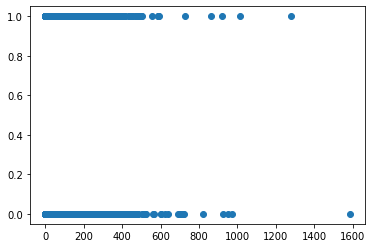

In [12]:
#Scatter plot to show customer satisfaction related to Arrival Delay in minutes
plt.scatter(df['Arrival Delay in Minutes'],df['satisfaction'])
plt.show()


In [13]:
# The Scatter plot does not show any important insight, the data must be seen from another perspective

In [14]:
#Box Plotdisplaying percentage of Satisfied and instatisfie customers when there is an Arrival Delay, when there is 
# a Departure Delay and when there is no Delay

# Creating a Data Frame for Arrival Delay
i=0
for i in df['Arrival Delay']:
    
    
    


SyntaxError: unexpected EOF while parsing (<ipython-input-14-60c287fcd4ad>, line 9)

In [ ]:
df.describe()

In [ ]:
df['satisfaction'].describe()

In [ ]:
df['Arrival Delay in Minutes'].describe()

In [ ]:
df.groupby(['Departure Delay in Minutes','satisfaction']).size().describe()

In [ ]:
df.groupby(['Arrival Delay in Minutes','satisfaction']).size().describe()

In [ ]:
df.groupby('satisfaction').agg(["mean", "min", "max", "median"])

In [ ]:
df.groupby('satisfaction').Age.agg(["mean", "min", "max", "median"])

In [ ]:
#What are the attributes that satisfied customers gave the highest punctuation
#What are the attributes that unsatisfied customers gave the lowest punctuation
#usar media, mediana y moda
#scatter plot for correlation
#Line plot to show customer satisfaction related to flight duration